In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchsummary import summary

x = torch.rand(2,2)
print(x)
print(torch.cuda.is_available())

tensor([[0.7311, 0.9625],
        [0.7261, 0.4292]])
True


In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

C:\Users\cwdbo\anaconda3\envs\ml2\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
train_loader = torch.utils.data.DataLoader(
    train_set,batch_size = 1000
    ,shuffle = True
)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [5]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
print(len(train_set))
print(train_set.targets.bincount())

60000
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [7]:
sample = next(iter(train_set))
print(len(sample),type(sample))

2 <class 'tuple'>


In [8]:
image,label = sample

In [9]:
print(image.shape,torch.tensor(label).shape)

torch.Size([1, 28, 28]) torch.Size([])


label: 9


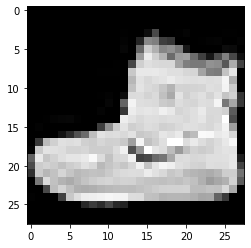

In [10]:
plt.imshow(image.squeeze(),cmap = 'gray')
print('label:',label)

In [11]:
batch = next(iter(train_loader))
print(len(batch),type(batch))
images,labels = batch

2 <class 'list'>


In [12]:
print(image.shape,labels.shape)

torch.Size([1, 28, 28]) torch.Size([1000])


labels: tensor([9, 2, 0, 8, 3, 7, 9, 9, 3, 7, 4, 1, 7, 9, 0, 0, 0, 7, 2, 1, 1, 3, 2, 2, 5, 2, 6, 3, 2, 9, 2, 7, 7, 0, 3, 6, 2,
        4, 7, 2, 3, 1, 8, 4, 8, 8, 1, 0, 8, 5, 3, 7, 6, 1, 6, 5, 5, 3, 0, 0, 8, 7, 4, 4, 5, 1, 6, 8, 7, 9, 2, 9, 3, 6,
        6, 1, 5, 4, 5, 5, 6, 2, 7, 4, 9, 2, 6, 2, 0, 9, 7, 1, 0, 5, 6, 6, 9, 1, 8, 4, 9, 5, 7, 2, 4, 6, 1, 4, 4, 8, 0,
        8, 7, 1, 1, 5, 0, 7, 6, 9, 5, 0, 6, 1, 4, 7, 1, 3, 5, 5, 5, 9, 2, 7, 7, 6, 8, 7, 5, 7, 7, 0, 5, 9, 9, 1, 5, 6,
        5, 9, 7, 7, 0, 8, 9, 9, 6, 6, 7, 9, 8, 7, 6, 8, 4, 0, 7, 2, 3, 7, 1, 3, 8, 4, 1, 3, 7, 4, 9, 1, 1, 0, 4, 2, 6,
        6, 7, 8, 8, 2, 2, 8, 0, 5, 4, 5, 9, 9, 4, 9, 1, 7, 2, 8, 2, 0, 3, 2, 1, 5, 8, 7, 2, 3, 5, 6, 7, 5, 6, 4, 4, 3,
        9, 2, 1, 1, 6, 0, 7, 2, 1, 7, 6, 3, 4, 8, 2, 6, 6, 5, 4, 5, 6, 2, 1, 8, 9, 9, 5, 3, 5, 5, 3, 3, 9, 9, 3, 2, 6,
        3, 6, 0, 2, 7, 0, 1, 7, 0, 9, 1, 8, 4, 8, 7, 6, 1, 5, 1, 9, 2, 9, 6, 0, 7, 7, 3, 2, 0, 2, 9, 8, 6, 4, 4, 4, 1,
        1, 8, 6, 0, 4, 4, 6, 6, 1, 4, 3,

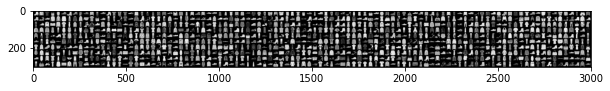

In [13]:
grid = torchvision.utils.make_grid(images, nrow=100)
plt.figure(figsize=(10,10))
plt.imshow(grid.permute(1,2,0))
print('labels:', labels)

In [3]:
import torch.nn as nn

In [15]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
   

    def forward(self,t):
# 
        return t

network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [16]:
import scipy.io as scio
# datas = scio.loadmat('../Y_TrainP.mat')
# print(datas['Y_TrainP'].shape)
# datas1 = np.transpose(datas['X_Train'],[3,2,0,1])
# print(datas1.shape)
# print(datas1[0,0,:,:])
# datas = scio.loadmat('../Y_TrainP.mat')
# print(datas['Y_TrainP'].shape)
# datas1 = np.transpose(datas['X_Train'],[3,2,0,1])
# print(datas1.shape)
# print(datas1[0,0,:,:])

In [17]:
np.save('../data/trainX.npy',datas1)

NameError: name 'datas1' is not defined

In [ ]:
# 1Ytrain-20210721T193346.mat
datas = scio.loadmat('../data/Y_TrainP.mat')
print(datas['Y_TrainP'].ndim)
datalb = datas['Y_TrainP']
print(len(datalb))
print(datalb[1,0])
emg1 = datalb[1,0]
type(emg1)
emg1.astype(np.float32)
np.save('../data/trainY.npy',datalb)
print(datalb[1,0])

2
21520
0
0


In [6]:
tx = np.load('../data/trainX.npy')
txp = tx[1,:,:,:]
print(txp.shape)
print(np.squeeze(txp).shape)

(1, 40, 10)
(40, 10)


In [2]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchsummary import summary

transform = transforms.Compose([
    transforms.ToTensor(),  # 将图片转换为Tensor,归一化至[0,1]
])

class EMGDataset(Dataset):
 
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.transforms = transform
 
    def __getitem__(self, index):
        emgData = self.data[index,...]
        emgData = np.squeeze(emgData)#似乎不应该压缩了
        # emgData =emgData.unsqueeze(0)
        # emglabel = self.label[index,0]

        emglabel = self.label[index]
        # while emglabel>=100:
        #     emglabel = emglabel-100

        emglabel = emglabel.astype(np.int16)
        # emglabel = emglabel/1.0
        emgData = self.transforms(emgData)
        # emglabel = self.transforms(emglabel)#.long()
        # self.data= emgData
        # self.label = emglabel
        
        return emgData,emglabel
 
    def __len__(self):
        return len(self.label)
 
 
# if __name__ == '__main__':
traindata = np.load('../data/trainX.npy')
trainlabel = np.load('../data/trainY.npy')
print(trainlabel[:,0])

trainlabel = trainlabel[:,0]
print(type(trainlabel))
train_set = EMGDataset(traindata, trainlabel)

train_loader1 = torch.utils.data.DataLoader(train_set, batch_size=2, shuffle=True)#, pin_memory=True,
                                            #num_workers=3)

# for x, y in train_loader:
#     print(x, y)
sample = next(iter(train_set))
# print(sample.shape)

[ 0  0  0 ... 51 51 51]
<class 'numpy.ndarray'>


In [19]:
batch = next(iter(train_loader1))
images, labels = batch
print(images.shape)
traindata = np.load('../data/trainX.npy')
print(traindata.shape)
print(type(traindata))
print(traindata[1,:,:,:].shape)

testX = iter(traindata)
testXX = next(testX)
print(testXX.shape)
# images = images.to(torch.float32)

torch.Size([2, 10, 1, 40])
(21520, 1, 40, 10)
<class 'numpy.ndarray'>
(1, 40, 10)
(1, 40, 10)


In [3]:
import torch.nn.functional as F
import torch.optim as optim

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)

        self.fc1 = nn.Linear(in_features=32 * 4 * 34, out_features=128)
        self.out = nn.Linear(in_features=128, out_features=52)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=1)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=1)

        # (4) hidden linear layer
        t = t.reshape(-1, 32 * 4 * 34)
        t = self.fc1(t)
        t = F.relu(t)

        # # (5) hidden linear layer
        # t = self.fc2(t)
        # t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)

        return t
        
net = Network()
print(net)
summary(net,(1,40,10),batch_size = 1,device = "cpu")

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4352, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=52, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [1, 32, 38, 8]             320
            Conv2d-2             [1, 32, 35, 5]           9,248
            Linear-3                   [1, 128]         557,184
            Linear-4                    [1, 52]           6,708
Total params: 573,460
Trainable params: 573,460
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 2.19
Estimated Total Size (MB): 2.31
----------------------------------------------

In [4]:
import torch.nn.functional as F
import torch.optim as optim

# train_set = EMGDataset(traindata, trainlabel)
 
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True, pin_memory=True,
#                                                num_workers=3)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
optimizer = optim.Adam(net.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch
# print(images.shape)#的确是（1，1，40，40）真有意思
for batch in train_loader:
    images, labels = batch
    images = images.to(torch.float32)
    # labels = labels-6501
    labels = labels.long()
    labels
    preds = net(images.to(torch.float32)) # Pass Batch

    # preds.squeeze(0)
    # print(preds)
    # print(labels)
    # print(preds.ndim,labels.ndim)

    loss = F.cross_entropy(preds, labels) # Calculate Loss
    # loss = F.cross_entropy(preds, torch.squeeze(labels)) # Calculate Loss

    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    print('loss1:', loss.item())
    preds = net(images)
    # print(preds.shape)
    # loss = F.cross_entropy(preds, torch.squeeze(labels))
    print('loss2:', loss.item())
    print(
    "epoch", epoch, 
    "total_correct:", total_correct, 
    "loss:", total_loss)

loss1: 3.9702095985412598
loss2: 3.9702095985412598


NameError: name 'epoch' is not defined

In [11]:
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
# optimizer = optim.Adam(network.parameters(), lr=0.01)
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# curr_total_correct = {}
net = net.to(device)
# loss = loss.to(device)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000,shuffle=True)
optimizer = optim.Adam(net.parameters(), lr=0.002)

for epoch in range(1000):

    total_loss = 0
    total_correct = 0
    curr_total_correct = 0

    for batch in train_loader: # Get Batch
        # batch = next(iter(train_loader)) # Get Batch
        
        images, labels = batch
        images = images.to(torch.float32)
        # labels = labels-6501
        labels = labels.long()
        labels
        preds = net(images.to(device)) # Pass Batch

        # preds.squeeze(0)
        # print(preds)
        # print(labels)
        # print(preds.ndim,labels.ndim)

        loss = F.cross_entropy(preds.to(device), labels.to(device)) # Calculate Loss
        # loss = F.cross_entropy(preds, torch.squeeze(labels)) # Calculate Loss
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
        
        # images, labels = batch
        # images = images.to(torch.float32)
        # labels = labels.long()

        # preds = network(images) # Pass Batch
        # loss = F.cross_entropy(preds, labels) # Calculate Loss

        # optimizer.zero_grad()
        # loss.backward() # Calculate Gradients
        # optimizer.step() # Update Weights

        total_loss += loss.item()
        # total_correct += get_num_correct(preds.to(device), labels.to(device))
        curr_total_correct = get_num_correct(preds.to(device), labels.to(device))

    print(
        "epoch", epoch, 
        "current_correct:", curr_total_correct, 
        "loss:", total_loss
    )
torch.save(net.state_dict(),'./cnnet.pth')

epoch 0 current_correct: 440 loss: 16.392222970724106
epoch 1 current_correct: 465 loss: 8.268952280282974
epoch 2 current_correct: 464 loss: 6.96181982755661
epoch 3 current_correct: 470 loss: 6.633197262883186
epoch 4 current_correct: 464 loss: 6.538451135158539
epoch 5 current_correct: 470 loss: 6.444520443677902
epoch 6 current_correct: 472 loss: 6.372890308499336
epoch 7 current_correct: 485 loss: 6.136444911360741
epoch 8 current_correct: 461 loss: 5.969356194138527
epoch 9 current_correct: 482 loss: 6.3235952109098434
epoch 10 current_correct: 463 loss: 6.098628014326096
epoch 11 current_correct: 466 loss: 5.478381350636482
epoch 12 current_correct: 474 loss: 5.360449194908142
epoch 13 current_correct: 484 loss: 5.361411958932877
epoch 14 current_correct: 488 loss: 5.047990038990974
epoch 15 current_correct: 492 loss: 4.771808788180351
epoch 16 current_correct: 482 loss: 4.30732761323452
epoch 17 current_correct: 484 loss: 4.49641227722168
epoch 18 current_correct: 478 loss: 4.4

KeyboardInterrupt: 